<a href="https://colab.research.google.com/github/eneykng/file-for-data-110/blob/main/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
penguins = sns.load_dataset('penguins')
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [8]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [15]:
df = penguins[penguins['body_mass_g'] > 4000]
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,Male
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,Male


In [19]:
df_2 = penguins[(penguins['bill_length_mm'] > 40) & (penguins['bill_length_mm'] < 50) & (penguins['bill_depth_mm'] < 18)]
df_2.shape

(129, 7)

In [37]:
species_island = penguins.groupby(['species', 'island'])['flipper_length_mm'].mean().sort_values(ascending = False)
species_island


species    island   
Gentoo     Biscoe       217.186992
Chinstrap  Dream        195.823529
Adelie     Torgersen    191.196078
           Dream        189.732143
           Biscoe       188.795455
Name: flipper_length_mm, dtype: float64

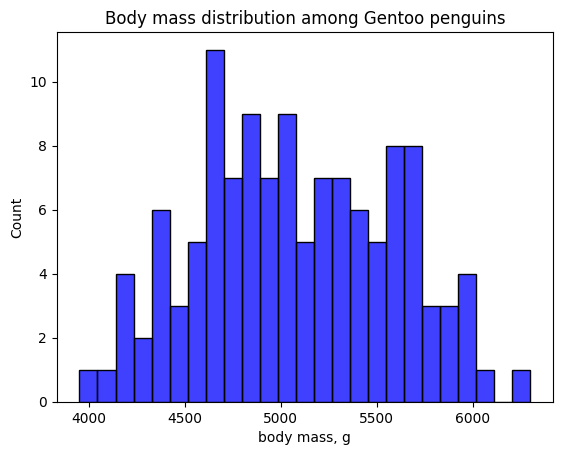

In [67]:
gentoo = penguins[penguins['species']=='Gentoo']
chinstrap = penguins[penguins['species']=='Chinstrap']
adelie = penguins[penguins['species']=='Adelie']
sns.histplot(gentoo['body_mass_g'], bins=25, color = 'blue')
plt.title('Body mass distribution among Gentoo penguins')
plt.xlabel('body mass, g')
plt.show()

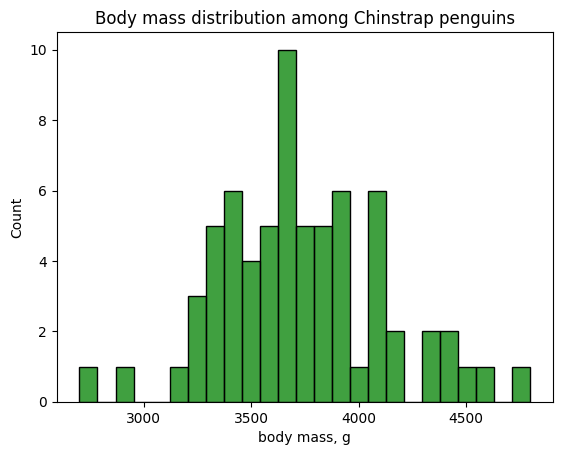

In [65]:
sns.histplot(chinstrap['body_mass_g'], bins=25, color = 'green')
plt.title('Body mass distribution among Chinstrap penguins')
plt.xlabel('body mass, g')
plt.show()

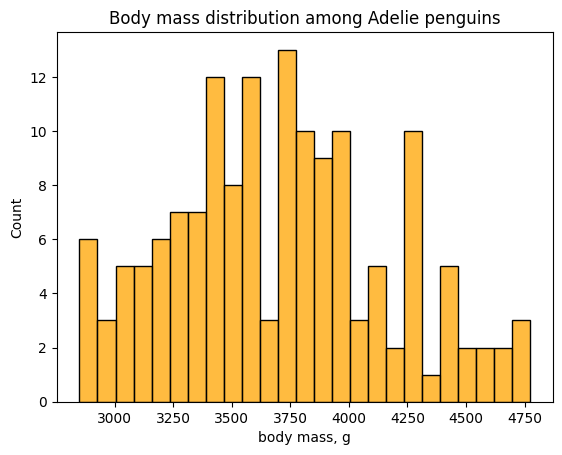

In [92]:
sns.histplot(adelie['body_mass_g'], bins=25, color = 'orange')
plt.title('Body mass distribution among Adelie penguins')
plt.xlabel('body mass, g')
plt.show()

(array([ 1.,  0.,  1.,  0.,  0.,  1.,  3.,  5.,  6.,  4.,  5., 10.,  5.,
         5.,  6.,  1.,  6.,  2.,  0.,  2.,  2.,  1.,  1.,  0.,  1.]),
 array([2700., 2784., 2868., 2952., 3036., 3120., 3204., 3288., 3372.,
        3456., 3540., 3624., 3708., 3792., 3876., 3960., 4044., 4128.,
        4212., 4296., 4380., 4464., 4548., 4632., 4716., 4800.]),
 <BarContainer object of 25 artists>)

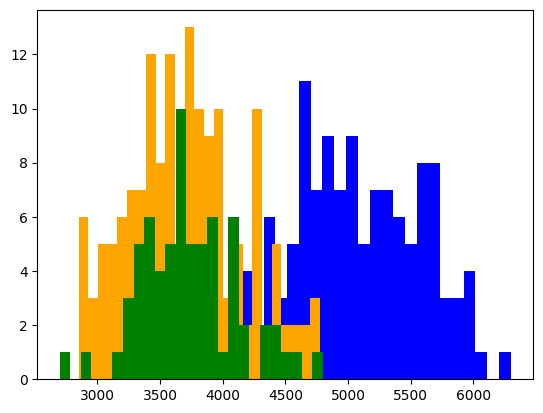

In [98]:
#combining all the histograms together
plt.hist(gentoo['body_mass_g'],color = 'blue', bins = 25)
plt.hist(adelie['body_mass_g'], color = 'orange', bins = 25)
plt.hist(chinstrap['body_mass_g'],  color = 'green', bins = 25)

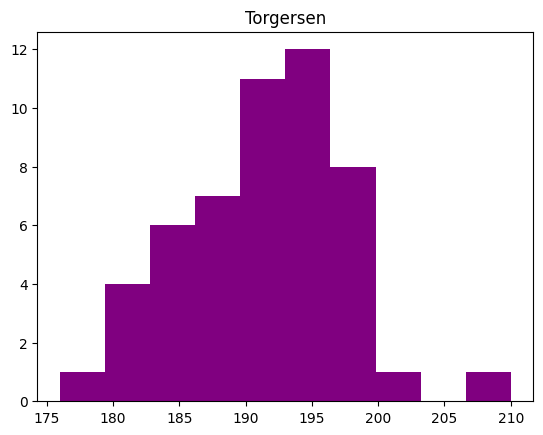

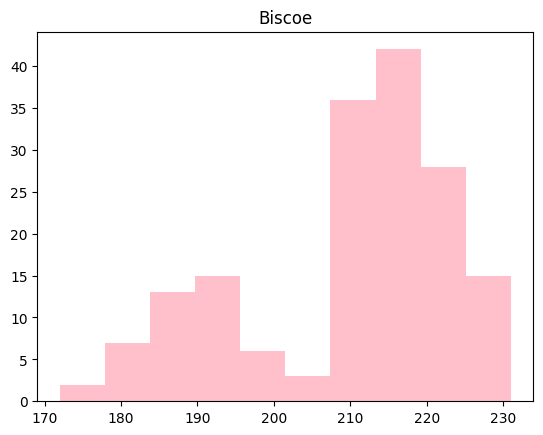

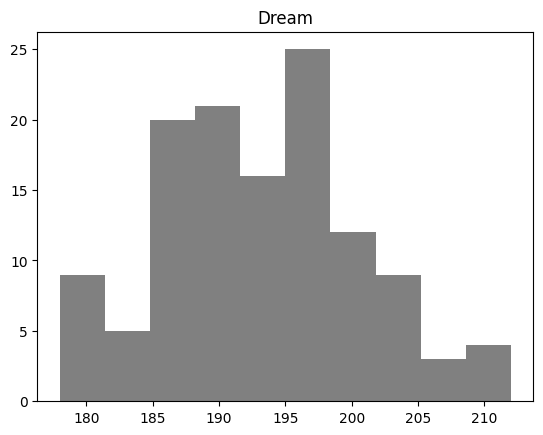

In [89]:
colors = ['purple', 'pink', 'grey']
islands = penguins['island'].unique()

for island, color in zip(islands, colors):
  subset = penguins[penguins['island']==island]
  plt.hist(subset['flipper_length_mm'], color = color, label = island)
  plt.title(island)
  plt.show()